In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

/Users/syahrulhamdani/.pyenv/versions/3.7.4/envs/hktv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/syahrulhamdani/.pyenv/versions/3.7.4/envs/hktv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/syahrulhamdani/.pyenv/versions/3.7.4/envs/hktv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.i

In [6]:
with tf.Session() as sess:
    print(sess.run(tf.random_normal((2, 5))))

[[-0.32403708 -0.3410924   0.334228   -1.0427669  -1.0469054 ]
 [ 0.17321418  0.7494333   0.79833376 -0.33324322  0.5352119 ]]


In [2]:
tf.__version__

'2.0.0'

In [4]:
mnist = tf.keras.datasets.mnist
mnist

<module 'tensorflow_core.keras.datasets.mnist' from '/Users/syahrulhamdani/.pyenv/versions/3.7.4/envs/hktv/lib/python3.7/site-packages/tensorflow_core/python/keras/api/_v2/keras/datasets/mnist/__init__.py'>

## Load MNIST Data

In [16]:
(X_train_ori, y_train_ori), (X_test_ori, y_test_ori) = mnist.load_data()

In [17]:
print('training set:')
print(X_train_ori.shape, y_train_ori.shape)
print('\ntest set:')
print(X_test_ori.shape, y_test_ori.shape)

training set:
(60000, 28, 28) (60000,)

test set:
(10000, 28, 28) (10000,)


## Explore Data

In [18]:
print(X_train_ori.dtype, type(X_train_ori))

uint8 <class 'numpy.ndarray'>


In [19]:
X_train_ori[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [1]:
num_px = X_train_ori.shape[1]
X_train_ori, X_test = X_train_ori.astype(np.float32), X_test_ori.astype(np.float32)
X_train_flatten, X_test_flatten = X_train_ori.reshape([-1, num_px*num_px]), X_test_ori.reshape([-1, num_px*num_px])
print("Flattened data has shape of", X_train_flatten.shape)
X_train, X_test = X_train_flatten/255., X_test_flatten/255.

NameError: name 'X_train_ori' is not defined

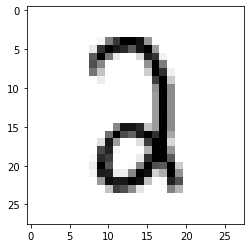

In [36]:
idx = np.random.randint(X_train_ori.shape[0], size=1)
plt.imshow(X_train_ori[idx].squeeze(0), cmap=plt.cm.binary)
plt.show()

In [38]:
def train_fig(n=5):
    assert n % 5 == 0, "n must be multiple of 5"
    indices = np.random.randint(0, len(X_train_ori), n)
    plt.figure(figsize=(10, 10))
    for i, idx in enumerate(indices):
        plt.subplot(n/5, 5, i+1)
        plt.imshow(X_train_ori[idx], cmap=plt.cm.binary)
        plt.xlabel(f"{y_train_ori[idx]}")
        plt.xticks([])
        plt.yticks([])
    plt.show()

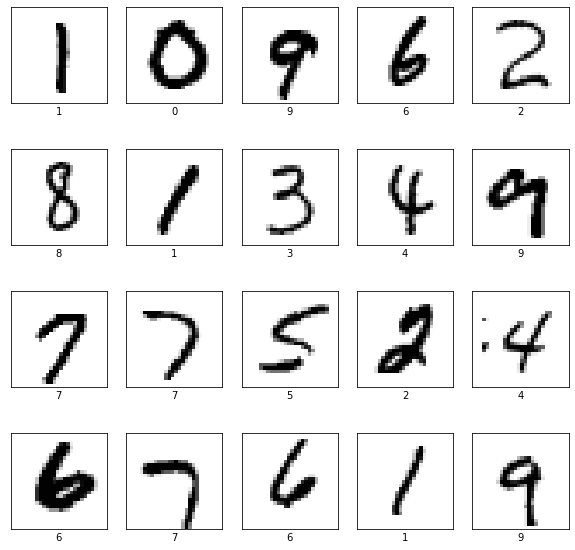

In [43]:
train_fig(20)